In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
filepath = '../SavedData/simulated_transaction_2024.csv'
data = pd.read_csv(filepath) 

## Parsing the Date's 

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['YearMonth'] = data['Date'].dt.to_period('M')

## Getting the Yearly Spending for Each User

In [8]:
monthly_spending = data[data['Amount'] < 0].groupby(['Account No', 'YearMonth'])['Amount'].sum().abs()
monthly_spending = monthly_spending.reset_index()
monthly_spending_average = monthly_spending.groupby('Account No')['Amount'].mean()
yearly_spending = monthly_spending.groupby('Account No')['Amount'].sum()
yearly_spending = yearly_spending.reset_index()
yearly_spending = yearly_spending.sort_values(by='Account No', ascending=True)
yearly_spending.rename(columns={'Amount': 'Spending'}, inplace=True)

## Getting the Yearling Earnings for Each User

In [9]:
monthly_earning = data[data['Amount'] > 0].groupby(['Account No', 'YearMonth'])['Amount'].sum().abs()
monthly_earning = monthly_earning.reset_index()
monthly_earning_average = monthly_earning.groupby('Account No')['Amount'].mean()
yearly_earning = monthly_earning.groupby('Account No')['Amount'].sum()
yearly_earning = yearly_earning.reset_index()
yearly_earning = yearly_earning.sort_values(by='Account No', ascending=True)
yearly_earning.rename(columns={'Amount': 'Earnings'}, inplace=True)

## Getting the Savings for Each User

In [10]:
# Join the two dataframes together
yearly_savings = pd.merge(yearly_earning, yearly_spending, on='Account No', how='inner')
yearly_savings['Savings'] = yearly_savings['Earnings'] - yearly_savings['Spending']

In [11]:
yearly_savings

,Account No,Earnings,Spending,Savings
0,101531259.0,16967.5,17627.58,-660.08
1,104832000.0,20550.0,25115.52,-4565.52
2,105375973.0,9900.0,10093.77,-193.77
3,106601471.0,18425.0,7776.00,10649.00
4,108481285.0,25104.0,15065.08,10038.92
...,...,...,...,...
871,995615876.0,19063.0,17634.27,1428.73
872,996042490.0,41250.0,35268.01,5981.99
873,998390769.0,19500.0,21323.35,-1823.35
874,998405607.0,6900.0,8816.16,-1916.16


## Getting the Difference in Balance for Each User

In [12]:
initial_balances = data.groupby('Account No').first()['Balance']
initial_balances = initial_balances.reset_index()
initial_balances.rename(columns={'Balance': 'Initial Balance'}, inplace=True) 
final_balances = data.groupby('Account No').last()['Balance']
final_balances = final_balances.reset_index()
final_balances.rename(columns={'Balance': 'Final Balance'}, inplace=True) 

# Difference in Balance for Each User
balance_difference = pd.merge(initial_balances, final_balances, on='Account No', how='inner')
balance_difference['Balance Difference'] = balance_difference['Final Balance'] - balance_difference['Initial Balance']

## Building ISA DataFrame

In [13]:
isa_df = pd.merge(balance_difference, yearly_savings, on='Account No', how='inner')

In [14]:
isa_pruned_df = isa_df[isa_df['Balance Difference'] > 0]

In [15]:
isa_df.head(50)

,Account No,Initial Balance,Final Balance,Balance Difference,Earnings,Spending,Savings
0,101531259.0,124.000,227.972100,103.972100,16967.50,17627.58,-660.08
1,104832000.0,3055.000,-3185.524859,-6240.524859,20550.00,25115.52,-4565.52
2,105375973.0,684.010,509.309653,-174.700347,9900.00,10093.77,-193.77
3,106601471.0,1481.010,11920.401863,10439.391863,18425.00,7776.00,10649.00
4,108481285.0,1376.000,10704.071830,9328.071830,25104.00,15065.08,10038.92
5,108563213.0,1576.010,26334.354972,24758.344972,41239.00,16493.64,24745.36
6,108812033.0,1383.000,717.064600,-665.935400,9130.00,9802.93,-672.93
7,108931112.0,585.000,16502.503089,15917.503089,53519.00,38496.41,15022.59
8,111137699.0,3247.000,-114.884550,-3361.884550,20100.00,21786.87,-1686.87
9,113747882.0,1395.010,13639.403889,12244.393889,28425.00,16186.61,12238.39


## Building the ISA Recommendation Graph

### Building the Color Logic

In [16]:
colors = []

for x in isa_df['Savings']:
    if x > 20000:
        colors.append('green')
    elif x > 10000:
        colors.append('limegreen')
    elif x > 0:
        colors.append('lightgreen')
    else:
        colors.append('red')

### Building the Graph

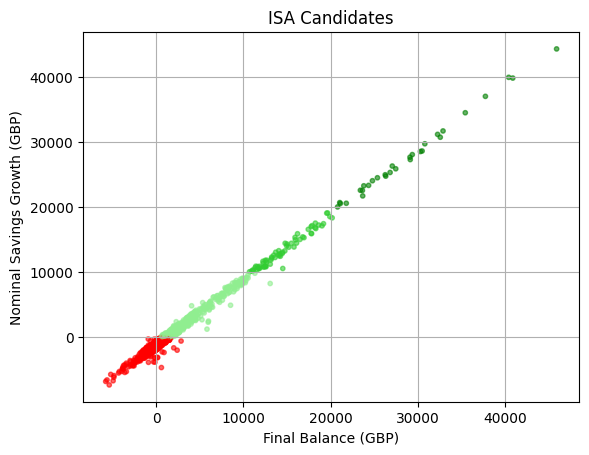

In [17]:
plt.scatter(isa_df['Final Balance'], isa_df['Savings'], color=colors, marker='o', s=10, alpha=0.6)  # 's' sets the size of the markers
plt.title('ISA Candidates')
plt.xlabel('Final Balance (GBP)')
plt.ylabel('Nominal Savings Growth (GBP)')
plt.grid(True)  # Adds a grid
plt.show()

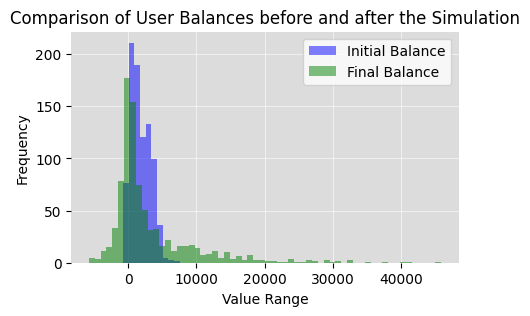

In [44]:
initial_balance_list = list(isa_df['Initial Balance'])
final_balance_list = list(isa_df['Final Balance'])

plt.figure(figsize=(5, 3))
plt.gca().set_facecolor('Gainsboro')
plt.grid(True, color='white', linestyle='-', linewidth=0.4, zorder=0)
plt.gca().set_axisbelow(True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.hist(initial_balance_list, bins=10, alpha=0.5, label='Initial Balance', color='blue')
plt.hist(final_balance_list, bins=60, alpha=0.5, label='Final Balance', color='green')

plt.title('Comparison of User Balances before and after the Simulation')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(0.58, 1))

plt.show()

Text(0.5, 0, 'Balance in £')

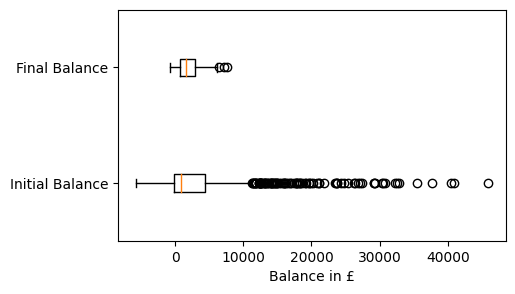

In [21]:
import seaborn as sns

initial_balance_list = list(isa_df['Initial Balance'])
final_balance_list = list(isa_df['Final Balance'])

combined_balance_list = [final_balance_list, initial_balance_list]

plt.figure(figsize=(5, 3))
plt.boxplot(combined_balance_list, vert=False)

plt.yticks([1, 2], ['Initial Balance', 'Final Balance'])  # Labeling each dataset
plt.xlabel('Balance in £')



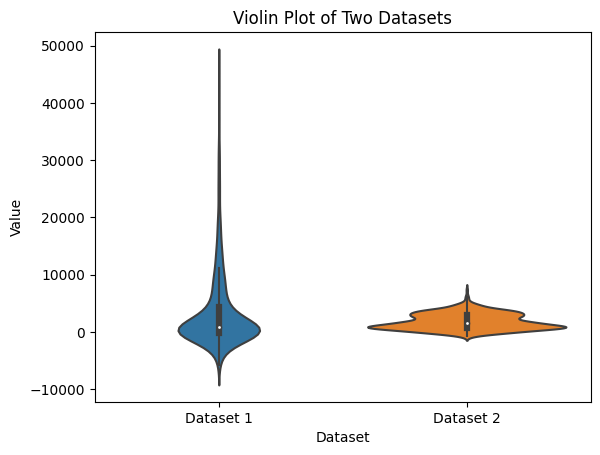

In [24]:
sns.violinplot(data=combined_balance_list)

plt.xticks([0, 1], ['Dataset 1', 'Dataset 2'])
plt.title('Violin Plot of Two Datasets')
plt.ylabel('Value')
plt.xlabel('Dataset')

plt.show()

In [43]:
len(final_balance_list)

876

In [44]:
len(initial_balance_list)

876